In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# 第1題

In [2]:
image = cv2.imread('mp2.jpg', cv2.IMREAD_GRAYSCALE)

In [3]:
class HistogramEqualization():
    def __init__(self, image, L):
        self.image = image
        self.L = L
    def opencv_equalizeHist(self):
        # implement of equalization histogram by opencv 
        self.image_equalize = cv2.equalizeHist(self.image)
    def implement(self):
        # my implement of equalization histogram
        image_flatten = self.image.flatten()
        pixel_count = Counter(image_flatten.tolist())
        pixel_item = list(pixel_count.items())
        pixel_item = sorted(pixel_item)
        hist = [j for _, j in pixel_item]
        pdf = np.array(hist)/sum(hist)
        cdf = pdf.cumsum()
        transform = np.ceil((self.L - 1) * cdf)
        self.implememt_image = transform[image_flatten].reshape(self.image.shape).astype("uint8")
        return self.implememt_image
    def calchist(self, image):
        # calculate histogram values
        return cv2.calcHist([image], [0], None, [256], [0,256])
    def plot_hist(self, origin_hist, opencv_hist, my_implement_hist):
        # show the distribution
        l1, = plt.plot(origin_hist, color = 'black', label = 'origin')
        l2, = plt.plot(opencv_hist, color = 'blue', label = 'opencv')
        l3, = plt.plot(my_implement_hist, color = 'red', label = 'My Implement')
        plt.legend([l1,l2,l3], labels = ['origin','opencv','My Implement'], loc = 'best')
        plt.title('Distribution')
        plt.show()
    def plot(self):
        # show the different way of equalization histogram image
        plt.subplot(1,3,1)
        plt.title('origin')
        plt.axis('off')
        plt.imshow(self.image,cmap = 'gray')
        
        plt.subplot(1,3,2)
        plt.title('opencv')
        plt.axis('off')
        plt.imshow(self.image_equalize,cmap = 'gray')
        
        plt.subplot(1,3,3)
        plt.title('My Implement')
        plt.axis('off')
        plt.imshow(self.implememt_image,cmap = 'gray')
        plt.show()
    def main(self):
        # Histogram equalization by different
        self.opencv_equalizeHist()
        self.implement()
        # Calculate the histogram value
        origin_hist = self.calchist(self.image)
        opencv_hist = self.calchist(self.image_equalize)
        my_implement_hist = self.calchist(self.implememt_image)
        # plot the result
        plt.figure(figsize=(10,10))
        plt.subplot(2,1,1)
        # show the image
        self.plot()
        plt.figure(figsize=(10,10))
        plt.subplot(2,1,2)
        # show the distribution
        self.plot_hist(origin_hist, opencv_hist, my_implement_hist)
        plt.show()

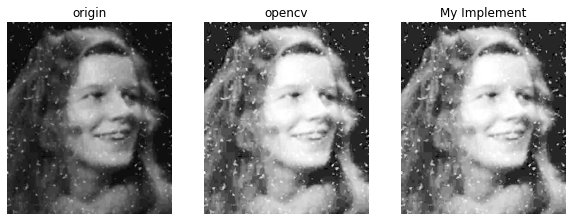

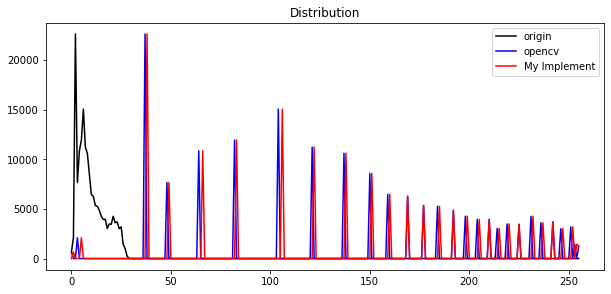

In [4]:
histogramequalization = HistogramEqualization(image,256)

histogramequalization.main()

# 第2題

## RGB

In [5]:
image = cv2.imread('mp2a.jpg')
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [6]:
class RGBHistogramEqualization():
    def __init__(self, image, L):
        self.image = image
        self.L = L
    def opencv_equalization(self):
        self.opencv = self.image.copy()
        for i in range(3):
            self.opencv[:,:,i] = cv2.equalizeHist(self.opencv[:,:,i])
    def my_implement(self):
        self.implement = self.image.copy()
        r,c,_ = self.implement.shape
        for i in range(3):
            flatten_image_i = self.implement[:,:,i].flatten()
            hist_i, _ = np.histogram(flatten_image_i, bins=np.arange(self.L + 1))
            pdf_i = hist_i/sum(hist_i)
            cdf_i = pdf_i.cumsum()
            transform_i = np.ceil((self.L - 1) * cdf_i)
            self.implement[:,:,i] = transform_i[flatten_image_i].reshape((r,c)).astype("uint8")
    def plot(self, title, image):
        plt.title(title)
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    def main(self):
        self.plot('origin',self.image)
        self.opencv_equalization()
        self.plot('opencv',self.opencv)
        self.my_implement()
        self.plot("My implement", self.implement)

In [7]:
rgbhistogram = RGBHistogramEqualization(RGB_image,256)

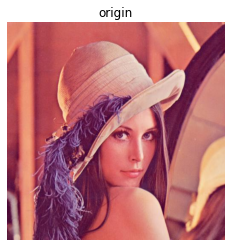

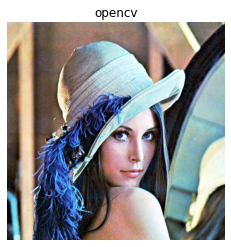

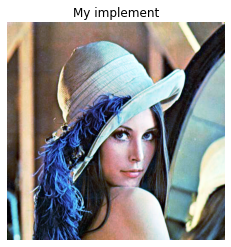

In [8]:
rgbhistogram.main()

## HSV

In [9]:
HSV_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [10]:
class HSVHistogramEqualization():
    def __init__(self, image, L):
        self.image = image
        self.L = L
    def opencv_equalization(self):
        self.opencv = self.image.copy()
        self.opencv[:,:,2] = cv2.equalizeHist(self.opencv[:,:,2])
        self.opencv = cv2.cvtColor(self.opencv, cv2.COLOR_HSV2RGB)
    def my_implement(self):
        self.implement = self.image.copy()
        r,c,_ = self.implement.shape
        for i in range(2,3):
            flatten_image_i = self.implement[:,:,i].flatten()
            hist_i, _ = np.histogram(flatten_image_i, bins=np.arange(self.L + 1))
            pdf_i = hist_i/sum(hist_i)
            cdf_i = pdf_i.cumsum()
            transform_i = np.ceil((self.L - 1) * cdf_i)
            self.implement[:,:,i] = transform_i[flatten_image_i].reshape((r,c)).astype("uint8")
        self.implement = cv2.cvtColor(self.implement, cv2.COLOR_HSV2RGB)
    def plot(self, title, image):
        plt.title(title)
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    def main(self):
        self.opencv_equalization()
        self.plot('opencv',self.opencv)
        self.my_implement()
        self.plot("My implement", self.implement)

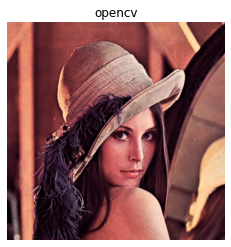

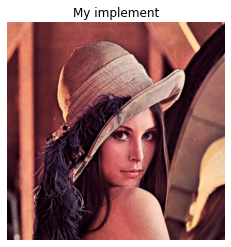

In [11]:
hsvhistogram = HSVHistogramEqualization(HSV_image, 256)
hsvhistogram.main()

## YCbCr

In [12]:
YCbCr_image = cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)

In [13]:
class YCBCRHistogramEqualization():
    def __init__(self, image, L):
        self.image = image
        self.L = L
    def opencv_equalization(self):
        self.opencv = self.image.copy()
        self.opencv[:,:,0] = cv2.equalizeHist(self.opencv[:,:,0])
        self.opencv = cv2.cvtColor(self.opencv, cv2.COLOR_YCR_CB2RGB)
    def my_implement(self):
        self.implement = self.image.copy()
        r,c,_ = self.implement.shape
        for i in range(1):
            flatten_image_i = self.implement[:,:,i].flatten()
            hist_i, _ = np.histogram(flatten_image_i, bins=np.arange(self.L + 1))
            pdf_i = hist_i/sum(hist_i)
            cdf_i = pdf_i.cumsum()
            transform_i = np.ceil((self.L - 1) * cdf_i)
            self.implement[:,:,i] = transform_i[flatten_image_i].reshape((r,c)).astype("uint8")
        self.implement = cv2.cvtColor(self.implement, cv2.COLOR_YCR_CB2RGB)
    def plot(self, title, image):
        plt.title(title)
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    def main(self):
        self.opencv_equalization()
        self.plot('opencv',self.opencv)
        self.my_implement()
        self.plot("My implement", self.implement)

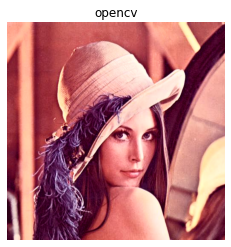

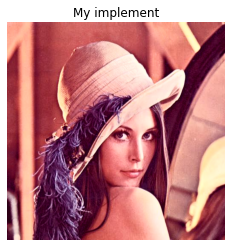

In [14]:
ycbcrhistogram = YCBCRHistogramEqualization(YCbCr_image,256)
ycbcrhistogram.main()

# Clahe

In [15]:
output = np.zeros(RGB_image.shape).astype('uint8')
for i in range(3):
    clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
    output[:,:,i] = clahe.apply(RGB_image[:,:,i])

(-0.5, 511.5, 511.5, -0.5)

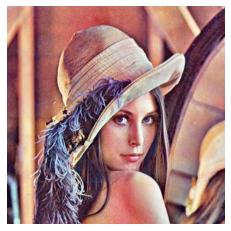

In [16]:
plt.imshow(output)
plt.axis("off")